In [1]:
from time import sleep
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = load_boston()


In [3]:
dir(dataset)
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
dataset['feature_names']


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
len(dataset['target'])

506

In [6]:
dataframe = pd.DataFrame(dataset['data'])

In [7]:
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
dataframe.columns = dataset['feature_names']

In [9]:
dataframe['price']  = dataset['target']


In [10]:
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
# 确定 features 之间的相关性
dataframe.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

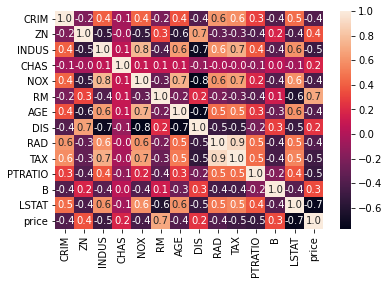

In [12]:
sns.heatmap(data=dataframe.corr(),annot=True,fmt=".1f")
# 根据热度图我们能够看出跟房价最正相关的feature是RM；最负相关的是LSTAT

In [13]:
X_rm = dataframe['RM'].values
X_rm

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [14]:
Y = dataframe['price'].values
Y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [15]:
rm_to_price = {r : y for r,y in zip(X_rm,Y)}
rm_to_price

{6.575: 24.0,
 6.421: 21.6,
 7.185: 34.9,
 6.998: 33.4,
 7.147: 36.2,
 6.43: 28.7,
 6.012: 22.9,
 6.172: 27.1,
 5.631: 16.5,
 6.004: 20.3,
 6.377: 15.0,
 6.009: 21.7,
 5.889: 21.7,
 5.949: 20.4,
 6.096: 13.5,
 5.834: 19.9,
 5.935: 8.4,
 5.99: 17.5,
 5.456: 20.2,
 5.727: 18.2,
 5.57: 13.6,
 5.965: 19.6,
 6.142: 15.2,
 5.813: 16.6,
 5.924: 15.6,
 5.599: 13.9,
 6.047: 14.8,
 6.495: 26.4,
 6.674: 21.0,
 5.713: 20.1,
 6.072: 14.5,
 5.95: 13.2,
 5.701: 13.1,
 5.933: 18.9,
 5.841: 20.0,
 5.85: 21.0,
 5.966: 16.0,
 6.595: 30.8,
 7.024: 34.9,
 6.77: 26.6,
 6.169: 25.3,
 6.211: 25.0,
 6.069: 21.2,
 5.682: 19.3,
 5.786: 20.0,
 6.03: 11.9,
 5.399: 14.4,
 5.602: 19.4,
 5.963: 19.7,
 6.115: 20.5,
 6.511: 25.0,
 5.998: 23.4,
 5.888: 23.3,
 7.249: 35.4,
 6.383: 24.7,
 6.816: 31.6,
 6.145: 23.3,
 5.927: 19.6,
 5.741: 18.7,
 6.456: 22.2,
 6.762: 25.0,
 7.104: 33.0,
 6.29: 23.5,
 5.787: 19.4,
 5.878: 22.0,
 5.594: 17.4,
 5.885: 20.9,
 6.417: 13.0,
 5.961: 20.5,
 6.065: 22.8,
 6.245: 23.4,
 6.273: 24.1,
 

In [16]:
# 给定一种方式：使用查表的方式，将已知的所有rm-price关系存好，
# 当需要查询新的rm和price的对应关系时，可以取相近的已知情况
def knn(history_price,query_x,topn=3):
    return np.mean([p for rm,p in sorted(history_price.items(),key=lambda x_y:(x_y[0] - query_x)**2)[:topn]])

In [17]:
knn(rm_to_price,4)

14.6

In [18]:
# 以上的方法其实是一种经典的机器学习算法： KNN ==> K-Neighbor-Nearest
# KNN 是一种lazy learning 只能处理原始数据中的一些情况的预测，
# 而且在数据量特别大的时候比较低效（）需要预先把所有的原始数据加载到内存

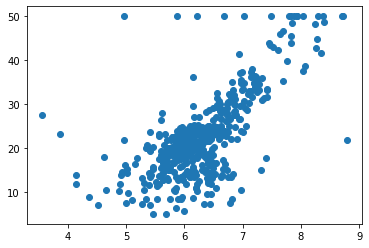

In [19]:
# 现在给定另一种方式: 拟合一个rm-price的函数关系 这样输入新的rm值到函数中就可以计算出对应的price

# 简单查看一下rm-price的图像关系,类似一个一次函数y=kx+b
plt.scatter(X_rm,Y)


In [20]:
# 假设拟合的函数是y=kx+b 那么只要找到最合适的k和b让拟合出的线更加贴合原始数据就可以了
# 现给出一个评测标准 计算y_true和y_hat之间的差距  差距越小代表函数拟合的越好，
# 此处的loss是MSE
def loss(y_true,y_hat):
    return np.mean((np.array(y_true)-np.array(y_hat))**2)

In [21]:
def model(x, k, b):
    return x * k + b

In [22]:
# 通过计算出loss-k的导数 来控制k第二次取值的方向 (监督学习)
def partial_k(y,x,k_n,b_n):
    return 2 * np.mean((y - (x * k_n + b_n)) * (-x))

In [23]:
# 通过计算出loss-b的导数 来控制b第二次取值的方向
def partial_b(y,x,k_n,b_n):
    return 2 * np.mean((y - (x * k_n + b_n)) * (-1))

In [24]:
import random
epochs = 800
MAX_VAR,MIN_VAR = 10,-10
k,b = random.randint(MIN_VAR,MAX_VAR),random.randint(MIN_VAR,MAX_VAR)
min_loss = float('inf')
best_k, best_b = None,None
lr = 1e-2
for epoch in range(epochs):
    Y_hat = model(X_rm,k,b)
    loss_ = loss(Y,Y_hat)
    if loss_ < min_loss:
        best_k = k
        best_b = b
        min_loss = loss_
        print('epoch = {}; best_k = {};  best_b = {};  min_loss = {}'.format(epoch,best_k,best_b,min_loss))
    k = k + (-1) * partial_k(Y,X_rm,k,b) * lr
    b = b + (-1) * partial_b(Y,X_rm,k,b) * lr

epoch = 0; best_k = 0;  best_b = 10;  min_loss = 241.49079051383399
epoch = 1; best_k = 1.6649734229249016;  best_b = 10.0413811419274;  min_loss = 74.96347940997488
epoch = 2; best_k = 1.9931222857440523;  best_b = 10.040688748467382;  min_loss = 68.50138183324967
epoch = 3; best_k = 2.0589091495180356;  best_b = 10.031741275150363;  min_loss = 68.23373527374856
epoch = 4; best_k = 2.073205200265864;  best_b = 10.021175842257021;  min_loss = 68.21041925907215
epoch = 5; best_k = 2.077395460394547;  best_b = 10.010295032963613;  min_loss = 68.19764476575666
epoch = 6; best_k = 2.079602045239394;  best_b = 9.999354488276182;  min_loss = 68.18550271648958
epoch = 7; best_k = 2.0814189797991123;  best_b = 9.988404379094229;  min_loss = 68.17343402195716
epoch = 8; best_k = 2.0831591032953662;  best_b = 9.977454551296658;  min_loss = 68.16138233369396
epoch = 9; best_k = 2.08488381281119;  best_b = 9.966506936680412;  min_loss = 68.14933864825103
epoch = 10; best_k = 2.0866051580592093;  b

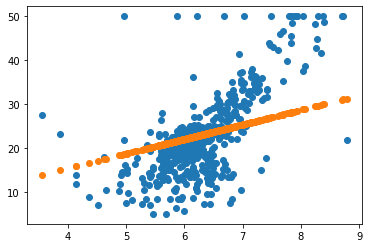

In [25]:
plt.scatter(X_rm,Y)
plt.scatter(X_rm,X_rm * best_k + best_b)